In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

C:\Users\HP\AppData\Local\Temp\ipykernel_13816\108744106.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
x, y = make_regression(n_samples=100, n_features=1, bias = 0, noise =5,random_state=40)
# Scale feature x to range -5…..5
x = np.interp(x, (x.min(), x.max()), (-5, 5))
# Scale target y to range 15…..-15


y = np.interp(y, (y.min(), y.max()), (15, -15))

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

hyper_parameter=[0.1,0.5,1.0,1.5]

In [3]:
def ridge_regression(x_train,y_train,hparam):
    
    X=np.c_[[1]*len(x_train),x_train]
    XT=np.transpose(X)
    XT_X=np.matmul(XT,X)
    I=np.identity(X.shape[1])
    # print(X.shape[1])
    Regularization_term=(I*hparam)
    XT_X_aI=np.add(XT_X,Regularization_term)
    XT_X_aI_inv=np.linalg.inv(XT_X_aI)
    XT_y=np.matmul(XT,y_train)
    weight_vector=np.matmul(XT_X_aI_inv,XT_y)
    # print("w*=\n",weight_vector)
    return weight_vector

In [4]:
weight_vector_all=[]
for i in hyper_parameter:
    weight_vector=ridge_regression(x_train,y_train,hparam=i)
    weight_vector_all.append(ridge_regression(x_train,y_train,hparam=i))
data={'Hyperparameter':hyper_parameter,'Weight Vector':weight_vector_all}
df=pd.DataFrame(data)
print("Result :")
print(df)

Result :
   Hyperparameter                                 Weight Vector
0             0.1    [-0.013393023941628885, -3.06126036871449]
1             0.5  [-0.014956126544113586, -3.0572390731678682]
2             1.0    [-0.01688137561489338, -3.052229634015259]
3             1.5   [-0.01877541936076604, -3.0472391380548007]


In [5]:
y_te_predicted=np.dot(x_test,weight_vector[1])+weight_vector[0]
print("\n\nPrediction on testing data set=\n",np.transpose(y_te_predicted))
result=mean_squared_error(y_true=y_test,y_pred=y_te_predicted)
print("Root Mean Squared Error on Prediction and Testing data set: ", result)
# print(np.shape(y_test),np.shape(y_predicted))

y_tr_predicted=np.dot(x_train,weight_vector[1])+weight_vector[0]
print("\n\nPrediction on training data set=\n",np.transpose(y_tr_predicted))
result=mean_squared_error(y_true=y_train,y_pred=y_tr_predicted)
print("Root Mean Squared Error on Prediction and Training data set: ", result)

y_predicted=np.dot(x,weight_vector[1])+weight_vector[0]



Prediction on testing data set=
 [[ -5.88535064   1.50808655   4.41271552   0.80099111  -5.21699575
   -2.39368181 -10.04474222  -5.93550273  -9.24794038  -5.4810294
   -1.91517723  -6.96613783   3.19098281  -6.38276548  -5.85310376
   -6.60101665   4.77378882   0.99874272  -6.90182332   2.28045367]]
Root Mean Squared Error on Prediction and Testing data set:  0.16962139964647546


Prediction on training data set=
 [[-11.88010737   8.21814491  -1.20845708   1.24019331  -2.07044904
    1.89776323   0.13523594  -7.96916574   9.133267     8.27732148
   -8.06289774  -7.47360708  -2.76828546  -2.95071875   6.37192115
   -1.00899531  -2.9839995    4.2383299   -6.88062311   9.111771
    1.34979238  -7.22218389  -9.81861966  -0.96448601 -15.25497111
    3.23208355  -0.58436276  15.21742027   0.8290079  -10.88562263
   -1.33098629   6.63745549   1.30372405   7.03676537  -3.4806652
   -9.36206214   1.22620348  -0.705238    -5.00914998   4.23842673
    5.2497681   -0.57976711   0.08210327   0.8

In [6]:
print("\n\n\nUsing function Ridge() from scikit-learn:")
for i in hyper_parameter:
    rid_regr=linear_model.Ridge(alpha=i)
    rid_regr.fit(x_train,y_train)
    y_pred_inbuilt=preds=rid_regr.predict(x_test)
    print("\nHyper Parameter =",i)
    print('Prediction : \n' ,y_pred_inbuilt)
    result=mean_squared_error(y_true=y_test,y_pred=y_pred_inbuilt)
    print("Root Mean Squared Error on Testing and Prediction: ", result) 




Using function Ridge() from scikit-learn:

Hyper Parameter = 0.1
Prediction : 
 [ -5.90697606   1.52047611   4.4384684    0.81012753  -5.23554627
  -2.39924312 -10.08550376  -5.95735889  -9.28503607  -5.50079466
  -1.91853708  -6.99273564   3.21111486  -6.40667936  -5.87458083
  -6.62593464   4.80120289   1.00878894  -6.92812523   2.29639665]
Root Mean Squared Error on Testing and Prediction:  0.17399870703812056

Hyper Parameter = 0.5
Prediction : 
 [ -5.90086157   1.51681386   4.4309652    0.80740032  -5.23031558
  -2.39774584 -10.07388907  -5.95117808  -9.27447504  -5.49521482
  -1.91767256  -6.98519196   3.20522723  -6.39990711  -5.86850897
  -6.61887378   4.79322222   1.00580022  -6.92066659   2.29171306]
Root Mean Squared Error on Testing and Prediction:  0.17267357790255708

Hyper Parameter = 1.0
Prediction : 
 [ -5.89324104   1.51224958   4.42161394   0.80400137  -5.22379654
  -2.39587978 -10.05941364  -5.9434749   -9.26131278  -5.48826064
  -1.91659511  -6.97579024   3.1978

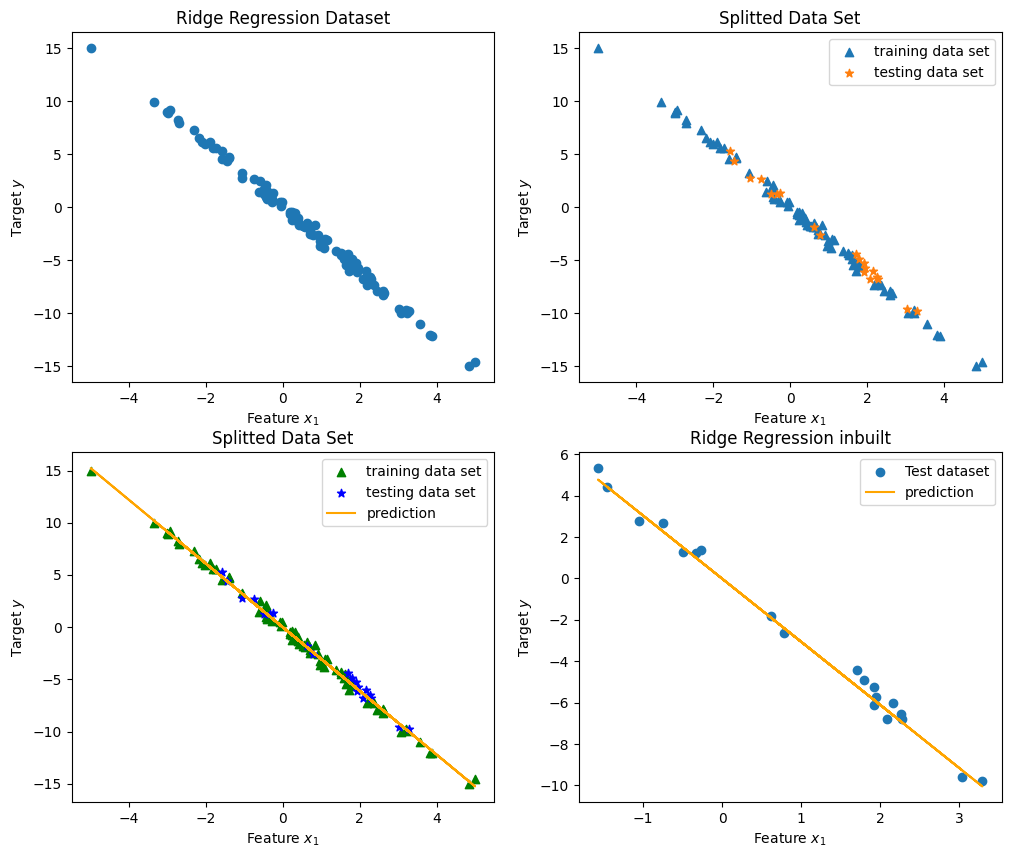

In [7]:
# Plot 1: Overall Data Set
fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(12, 10))
ax[0,0].scatter(x,y,label='Overall dataset')
ax[0,0].set_title('Ridge Regression Dataset')
ax[0,0].set_xlabel(r'Feature $x_1$')
ax[0,0].set_ylabel(r'Target $y$')
ax[0,0].legend

# Plot 2: Training and Testing
ax[0, 1].scatter(x_train, y_train, marker='^', label="training data set") 
ax[0, 1].scatter(x_test, y_test, marker='*', label="testing data set")
ax[0, 1].set_title("Splitted Data Set")
ax[0, 1].set_xlabel(r'Feature $x_1$')
ax[0, 1].set_ylabel(r'Target $y$')
ax[0, 1].legend()

# Plot 3: Training and Testing with regression line
ax[1, 0].scatter(x_train, y_train, marker='^', color='green' ,label="training data set") 
ax[1, 0].scatter(x_test, y_test, marker='*', color='blue',label="testing data set")
ax[1, 0].plot(x, y_predicted,'-', color='orange', label='prediction')
ax[1, 0].set_title("Splitted Data Set")
ax[1, 0].set_xlabel(r'Feature $x_1$')
ax[1, 0].set_ylabel(r'Target $y$')
ax[1, 0].legend()

ax[1, 1].scatter(x_test,y_test,label='Test dataset')
ax[1, 1].plot(x_test, y_pred_inbuilt,'-', color='orange', label='prediction')
ax[1, 1].set_title("Ridge Regression inbuilt")
ax[1, 1].set_xlabel(r'Feature $x_1$')
ax[1, 1].set_ylabel(r'Target $y$')
ax[1, 1].legend()

plt.show()